In [1]:
import pandas as pd
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv",)
data = pd.concat([train,test], axis=0,ignore_index=True)
df = data.copy()


In [3]:
test_id = test['id'] #save id

In [4]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [5]:
print(len(train))
print(len(test))
print(len(data))

140700
93800
234500


Understanding Data

In [6]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [7]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,234500.0000,234500.000000,46664.000000,187804.000000,46664.000000,46664.000000,187816.000000,234500.000000,234496.000000,140700.000000
mean,117249.5000,40.361847,3.148830,3.004111,7.664821,2.942761,2.969018,6.250542,2.984895,0.181713
std,67694.4634,12.387870,1.382966,1.404900,1.464707,1.365851,1.413948,3.855438,1.414027,0.385609
min,0.0000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,58624.7500,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,117249.5000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,175874.2500,51.000000,4.000000,4.000000,8.930000,4.000000,4.000000,10.000000,4.000000,0.000000
max,234499.0000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [8]:
column = df.select_dtypes(include='number')
sum = pd.DataFrame({
    "Min": column.min(),
    "Max": column.max()
})
sum

,Min,Max
id,0.00,234499.0
Age,18.00,60.0
Academic Pressure,1.00,5.0
Work Pressure,1.00,5.0
CGPA,5.03,10.0
Study Satisfaction,1.00,5.0
Job Satisfaction,1.00,5.0
Work/Study Hours,0.00,12.0
Financial Stress,1.00,5.0
Depression,0.00,1.0


In [9]:
cat_column = df.select_dtypes(include='object')
for col in cat_column.columns:
    print(f"Column: {col}")
    print(df[col].value_counts().head())
    print("-------------")

Column: Name
Name
Rohan       5290
Aarav       3835
Rupak       3610
Aaradhya    3468
Anvi        3433
Name: count, dtype: int64
-------------
Column: Gender
Gender
Male      128726
Female    105774
Name: count, dtype: int64
-------------
Column: City
City
Kalyan         10978
Patna           9812
Vasai-Virar     9662
Kolkata         9415
Ahmedabad       9290
Name: count, dtype: int64
-------------
Column: Working Professional or Student
Working Professional or Student
Working Professional    187827
Student                  46673
Name: count, dtype: int64
-------------
Column: Profession
Profession
Teacher           41291
Content Writer    13001
Architect          7352
Consultant         7149
HR Manager         6623
Name: count, dtype: int64
-------------
Column: Sleep Duration
Sleep Duration
Less than 5 hours    64445
7-8 hours            61460
More than 8 hours    54916
5-6 hours            53546
6-7 hours               15
Name: count, dtype: int64
-------------
Column: Dietary Habit

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234500 entries, 0 to 234499
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Name                                   234500 non-null  object 
 2   Gender                                 234500 non-null  object 
 3   Age                                    234500 non-null  float64
 4   City                                   234500 non-null  object 
 5   Working Professional or Student        234500 non-null  object 
 6   Profession                             173238 non-null  object 
 7   Academic Pressure                      46664 non-null   float64
 8   Work Pressure                          187804 non-null  float64
 9   CGPA                                   46664 non-null   float64
 10  Study Satisfaction                     46664 non-null   

In [11]:
df["Depression"].value_counts()

Depression
0.0    115133
1.0     25567
Name: count, dtype: int64

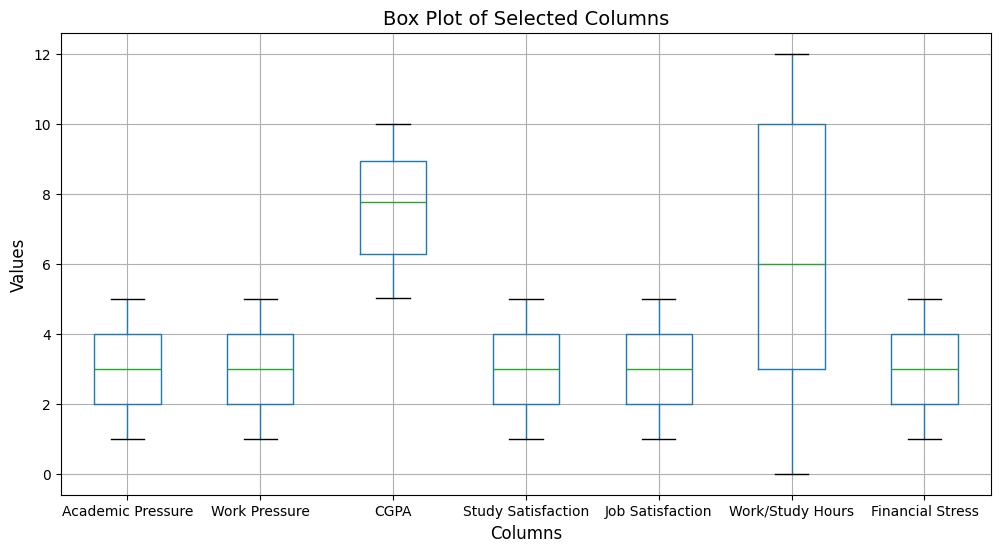

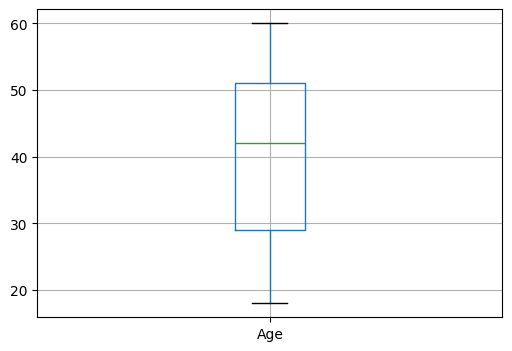

In [12]:
plt.figure(figsize=(12, 6))
df.boxplot(column=["Academic Pressure","Work Pressure","CGPA","Study Satisfaction","Job Satisfaction","Work/Study Hours","Financial Stress"])
plt.title('Box Plot of Selected Columns', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.figure(figsize=(6, 4))
df.boxplot(column="Age")
plt.show()

Data Preprocessing

In [13]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.124520
Academic Pressure                        80.100640
Work Pressure                            19.913006
CGPA                                     80.100640
Study Satisfaction                       80.100640
Job Satisfaction                         19.907889
Sleep Duration                            0.000000
Dietary Habits                            0.003838
Degree                                    0.001706
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.001706
Family History of Mental Illness          0.000000
Depression                     

In [14]:
df[df["Profession"].isnull()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0.0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0.0
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0.0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1.0


In [15]:
filtered_df = df[(df["Working Professional or Student"] == "Working Professional") & (df["Job Satisfaction"].isnull())]
filtered_df.head() 

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18752,18752,Aarti,Female,18.0,Kalyan,Working Professional,NaN,2.0,NaN,8.14,5.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1.0
25647,25647,Ishwar,Male,57.0,Kalyan,Working Professional,NaN,NaN,1.0,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,No,4.0,1.0,No,0.0
34694,34694,Kriti,Female,46.0,Meerut,Working Professional,NaN,NaN,NaN,NaN,NaN,NaN,5-6 hours,Moderate,Class 12,Yes,12.0,3.0,No,0.0
35612,35612,Siddhesh,Male,27.0,Vadodara,Working Professional,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,B.Pharm,No,11.0,3.0,No,1.0
41915,41915,Advait,Male,18.0,Kolkata,Working Professional,NaN,4.0,NaN,8.04,3.0,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1.0


In [16]:
df[df["Academic Pressure"].isnull()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0.0


In [17]:
df[df["CGPA"].isnull()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0.0


In [18]:
df[df["Study Satisfaction"].isnull()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0.0


In [19]:
df[(df["Working Professional or Student"] == "Working Professional") & (df["Study Satisfaction"].notnull())].head() 
#It seems like there was an error in data collection in the "Working Professional or Student" column because I noticed that "work pressure" is NaN, but "academic" has values.

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18752,18752,Aarti,Female,18.0,Kalyan,Working Professional,NaN,2.0,NaN,8.14,5.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1.0
41915,41915,Advait,Male,18.0,Kolkata,Working Professional,NaN,4.0,NaN,8.04,3.0,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1.0
55827,55827,Prachi,Female,19.0,Kalyan,Working Professional,NaN,3.0,NaN,8.11,2.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1.0
60348,60348,Nishant,Male,29.0,Agra,Working Professional,NaN,NaN,NaN,9.72,2.0,NaN,5-6 hours,Moderate,B.Ed,No,7.0,2.0,Yes,0.0
99062,99062,Tanisha,Female,24.0,Surat,Working Professional,Content Writer,4.0,NaN,5.42,4.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,1.0


In [20]:
df.loc[(df["Working Professional or Student"] == "Working Professional") & (df["Study Satisfaction"].notnull()), "Working Professional or Student"] = "Student"
df.loc[(df["Working Professional or Student"] == "Student") & (df["Profession"].notnull()), "Working Professional or Student"] = "Working Professional"

In [21]:
df.loc[
    (df["Working Professional or Student"] == "Student") & df["Profession"].isnull(),
    "Profession"
] = "Studying"

In [22]:
df.loc[
    (df["Working Professional or Student"] == "Working Professional") & df["Profession"].isnull(),
    "Profession"
] = "Unknown"

In [23]:
df.loc[
    (df["Working Professional or Student"] == "Student") & df["Job Satisfaction"].isnull(),
    "Job Satisfaction"
] = "Not Applicable"
df.loc[
    (df["Working Professional or Student"] == "Student") & df["Work Pressure"].isnull(),
    "Work Pressure"
] = "Not Applicable"
df.loc[
    (df["Working Professional or Student"] == "Student") & df["Study Satisfaction"].isnull(),
    "Study Satisfaction"
] = 3
df.loc[
    (df["Working Professional or Student"] == "Student") & df["Academic Pressure"].isnull(),
    "Academic Pressure"
] = 3

In [24]:
df[df["Working Professional or Student"] == "Working Professional"].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0.0


In [25]:
df.loc[
    (df["Working Professional or Student"] == "Working Professional") & df["Study Satisfaction"].isnull(),
    "Study Satisfaction"
] = "Working"
df.loc[
    (df["Working Professional or Student"] == "Working Professional") & df["Academic Pressure"].isnull(),
    "Academic Pressure"
] = "Working"
df.loc[
    (df["Working Professional or Student"] == "Working Professional") & df["CGPA"].isnull(),
    "CGPA"
] = "Working"

In [26]:
df[df["Dietary Habits"].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
59350,59350,Tanmay,Male,34.0,Agra,Student,Studying,5.0,Not Applicable,9.04,1.0,Not Applicable,More than 8 hours,NaN,B.Tech,Yes,4.0,5.0,Yes,1.0
64565,64565,Anvi,Female,23.0,Bangalore,Student,Studying,2.0,Not Applicable,6.91,5.0,Not Applicable,5-6 hours,NaN,M.Pharm,No,6.0,3.0,No,1.0
69581,69581,Vikram,Male,48.0,Hyderabad,Working Professional,Consultant,Working,3.0,Working,Working,2.0,Less than 5 hours,NaN,MBA,No,5.0,4.0,No,0.0
76436,76436,Raghavendra,Male,37.0,Nashik,Working Professional,Civil Engineer,Working,3.0,Working,Working,3.0,7-8 hours,NaN,ME,No,11.0,1.0,No,0.0
154066,154066,Gauri,Female,28.0,Vasai-Virar,Working Professional,Researcher,3.0,NaN,9.24,2.0,NaN,5-6 hours,NaN,BCA,Yes,1.0,5.0,Yes,NaN
169595,169595,Janvi,Female,18.0,Meerut,Student,Studying,5.0,Not Applicable,9.72,5.0,Not Applicable,More than 8 hours,NaN,Class 12,No,2.0,2.0,No,NaN
189315,189315,Rupak,Male,44.0,Bhopal,Working Professional,Business Analyst,Working,4.0,Working,Working,2.0,Less than 5 hours,NaN,MCA,No,4.0,3.0,Yes,NaN
228157,228157,Navya,Female,23.0,Ghaziabad,Working Professional,Teacher,Working,4.0,Working,Working,2.0,5-6 hours,NaN,BA,Yes,12.0,5.0,Yes,NaN
231089,231089,Tanvi,Female,27.0,Pune,Student,Studying,2.0,Not Applicable,5.64,2.0,Not Applicable,More than 8 hours,NaN,LLB,Yes,11.0,4.0,No,NaN


In [27]:
df["Dietary Habits"] = df["Dietary Habits"].fillna(df["Dietary Habits"].mode().iloc[0])

In [28]:
columns = df[["Gender","Working Professional or Student","Academic Pressure","Work Pressure","Study Satisfaction","Dietary Habits","Degree"]]

In [29]:
missing_percentage_2 = df.isnull().mean() * 100
print(missing_percentage_2)

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                                0.000000
Academic Pressure                         0.000000
Work Pressure                             0.034968
CGPA                                      0.008102
Study Satisfaction                        0.000000
Job Satisfaction                          0.033262
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.001706
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.001706
Family History of Mental Illness          0.000000
Depression                     

In [30]:
df[df["CGPA"].isnull()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,21880,Aarush,Male,38.0,Chennai,Student,Studying,3.0,5.0,NaN,3.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0.0
52737,52737,Aarav,Male,28.0,Vadodara,Student,Studying,3.0,Not Applicable,NaN,4.0,Not Applicable,Less than 5 hours,Healthy,BBA,No,12.0,2.0,No,0.0
58062,58062,Ishita,Female,32.0,Vadodara,Student,Studying,5.0,Not Applicable,NaN,3.0,Not Applicable,Less than 5 hours,Unhealthy,Class 12,Yes,11.0,5.0,No,1.0
70453,70453,Veda,Female,20.0,Ahmedabad,Student,Studying,3.0,Not Applicable,NaN,3.0,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1.0
75007,75007,Aarav,Male,21.0,Lucknow,Student,Studying,3.0,2.0,NaN,3.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0.0


In [31]:
df[df["Job Satisfaction"].isnull()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
609,609,Anand,Male,21.0,Ahmedabad,Working Professional,Civil Engineer,5.0,NaN,7.83,1.0,NaN,5-6 hours,Healthy,MSc,Yes,11.0,3.0,Yes,1.0
2105,2105,Shreya,Female,31.0,Vadodara,Working Professional,Architect,5.0,NaN,6.95,3.0,NaN,Less than 5 hours,Moderate,BSc,No,8.0,1.0,Yes,1.0
9483,9483,Vidya,Female,32.0,Kalyan,Working Professional,UX/UI Designer,3.0,NaN,9.6,2.0,NaN,7-8 hours,Moderate,PhD,Yes,5.0,3.0,No,1.0
11470,11470,Anjali,Female,28.0,Ahmedabad,Working Professional,Digital Marketer,5.0,NaN,9.72,3.0,NaN,More than 8 hours,Healthy,MA,Yes,10.0,5.0,Yes,1.0
12425,12425,Rupak,Male,25.0,Kalyan,Working Professional,Content Writer,5.0,NaN,8.5,2.0,NaN,5-6 hours,Moderate,B.Ed,Yes,0.0,2.0,Yes,1.0


In [32]:
print("CGPA_mean =" ,data["CGPA"].mean())
print("Job_mode =",data["Job Satisfaction"].mode().iloc[0])

CGPA_mean = 7.6648213290759495
Job_mode = 2.0


In [33]:
df["CGPA"] =  df["CGPA"].fillna(data["CGPA"].mean())
df["Job Satisfaction"] =  df["Job Satisfaction"].fillna(data["Job Satisfaction"].mode().iloc[0])

In [34]:
missing_percentage_3 = df.isnull().mean() * 100
print(missing_percentage_3)

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                                0.000000
Academic Pressure                         0.000000
Work Pressure                             0.034968
CGPA                                      0.000000
Study Satisfaction                        0.000000
Job Satisfaction                          0.000000
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.001706
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.001706
Family History of Mental Illness          0.000000
Depression                     

In [35]:
df[df["Degree"].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
110064,110064,Riya,Female,28.0,Srinagar,Working Professional,Unknown,Working,3.0,Working,Working,3.0,5-6 hours,Unhealthy,NaN,Yes,4.0,2.0,Yes,1.0
128934,128934,Anaya,Female,28.0,Srinagar,Working Professional,Unknown,Working,5.0,Working,Working,4.0,Less than 5 hours,Unhealthy,NaN,Yes,3.0,3.0,Yes,0.0
197408,197408,Aishwarya,Female,20.0,Ludhiana,Working Professional,HR Manager,Working,4.0,Working,Working,1.0,Less than 5 hours,Healthy,NaN,Yes,2.0,1.0,No,NaN
233698,233698,Charvi,Female,32.0,Varanasi,Student,Studying,1.0,Not Applicable,6.83,3.0,Not Applicable,Less than 5 hours,Unhealthy,NaN,No,0.0,4.0,No,NaN


In [36]:
working = df[df["Working Professional or Student"] == "Working Professional"]
studying = df[df["Working Professional or Student"] == "Student"]

In [37]:
print("Working_Degree_mode =",working["Degree"].mode().iloc[0])
print("Studying_degree_mode =",studying["Degree"].mode().iloc[0])

Working_Degree_mode = B.Ed
Studying_degree_mode = Class 12


In [38]:
df.loc[df["Working Professional or Student"] == "Working Professional", "Degree"] = df.loc[df["Working Professional or Student"] == "Working Professional", "Degree"].fillna(working["Degree"].mode().iloc[0])
df.loc[df["Working Professional or Student"] == "Student", "Degree"] = df.loc[df["Working Professional or Student"] == "Student", "Degree"].fillna(studying["Degree"].mode().iloc[0])


In [39]:
df["Financial Stress"] = df["Financial Stress"].fillna(df["Financial Stress"].mode().iloc[0])

In [40]:
print(data["Work Pressure"].value_counts())
print("Work_Pressue_mode =",data["Work Pressure"].mode().iloc[0])

Work Pressure
2.0    40628
5.0    37549
4.0    37486
3.0    36549
1.0    35592
Name: count, dtype: int64
Work_Pressue_mode = 2.0


In [41]:
df["Work Pressure"] = df["Work Pressure"].fillna(data["Work Pressure"].mode().iloc[0])

In [42]:
df.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                         0
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                               93800
dtype: int64

Feature Selection

In [43]:
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [44]:
df = df.drop(columns = ["id","Name"])

In [45]:
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,Working,5.0,Working,Working,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,Male,26.0,Varanasi,Working Professional,Teacher,Working,4.0,Working,Working,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,Male,33.0,Visakhapatnam,Student,Studying,5.0,Not Applicable,8.97,2.0,Not Applicable,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,Male,22.0,Mumbai,Working Professional,Teacher,Working,5.0,Working,Working,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,Female,30.0,Kanpur,Working Professional,Business Analyst,Working,1.0,Working,Working,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [46]:
train_A = df[:len(train)]
train_A.shape

(140700, 18)

In [47]:
A = train_A[["Gender","City","Working Professional or Student","Profession","Academic Pressure","Work Pressure","Job Satisfaction","Sleep Duration","Dietary Habits","Degree","Have you ever had suicidal thoughts ?","Financial Stress","Family History of Mental Illness"]]
B = train_A["Depression"]
A = A.astype(str)


In [48]:
for col in A.columns:
    le = LabelEncoder()
    A[col] = le.fit_transform(A[col])
A.head()

,Gender,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
0,0,50,1,10,5,4,1,29,7,33,0,1,0
1,1,93,1,56,5,3,2,27,20,63,1,2,0
2,1,97,0,55,4,5,5,15,7,21,1,0,0
3,1,64,1,56,5,4,0,27,15,28,1,0,1
4,0,37,1,9,5,0,0,15,20,28,1,3,1


In [49]:
Chi_score = chi2(A,B)
Chi_score

(array([4.19414123e+00, 1.05873473e+03, 7.53895181e+03, 1.03569047e+05,
        5.79932137e+03, 3.42956524e+04, 1.31599643e+04, 4.10196785e+01,
        5.69847102e+03, 4.28123333e+03, 8.66794834e+03, 7.29883910e+03,
        1.92675323e+01]),
 array([4.05638933e-002, 3.07476867e-232, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.50704162e-010,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.13622169e-005]))

<Axes: >

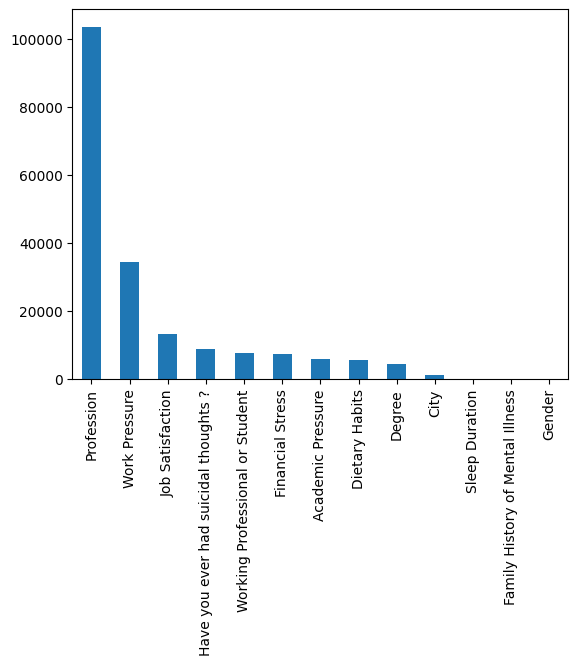

In [50]:
chi_df = pd.Series(Chi_score[0],index = A.columns)
chi_df.sort_values(ascending=False,inplace = True)
chi_df.plot.bar()

<Axes: >

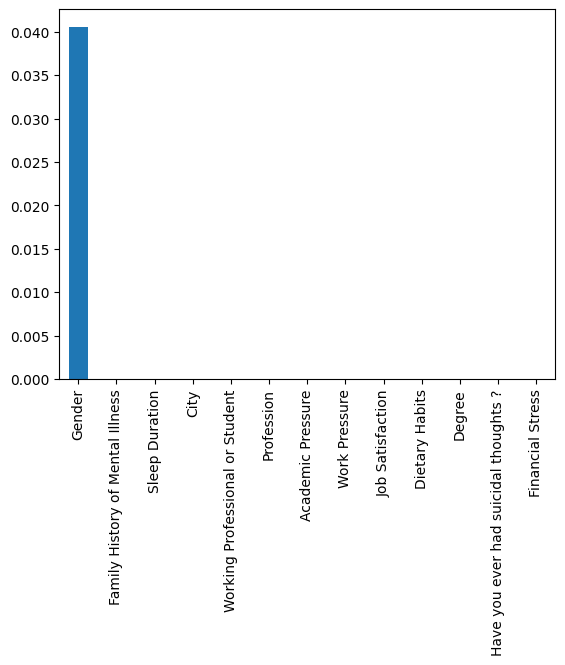

In [51]:
p_df = pd.Series(Chi_score[1],index = A.columns)
p_df.sort_values(ascending=False,inplace = True)
p_df.plot.bar()

In [52]:
correlation = train_A[["Age","Work/Study Hours","Depression"]]
correlation_matrix = correlation.corr(method='pearson')
print(correlation_matrix)

                       Age  Work/Study Hours  Depression
Age               1.000000         -0.118356   -0.564671
Work/Study Hours -0.118356          1.000000    0.191746
Depression       -0.564671          0.191746    1.000000


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns in df: ", categorical_columns)

Categorical columns in df:  ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [55]:
label_encoders = {}

# Process df_train
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

In [56]:
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,62,1,13,5,4,339,5,1,38,11,50,0,1.0,2.0,0,0.0
1,1,26.0,118,1,72,5,3,339,5,2,35,32,92,1,7.0,3.0,0,1.0
2,1,33.0,123,0,69,4,5,273,1,5,17,11,34,1,3.0,1.0,0,1.0
3,1,22.0,79,1,72,5,4,339,5,0,35,22,44,1,10.0,1.0,1,1.0
4,0,30.0,46,1,12,5,0,339,5,0,17,32,44,1,9.0,4.0,1,0.0


Split Data

In [57]:
train_data = df[:len(train)]
test_data = df[len(train):]
test_data = test_data.drop(columns = "Depression")
print("train_size =",len(train_data))
print("test_size =",len(test_data))

train_size = 140700
test_size = 93800


Model Training 

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

In [59]:
X_train = train_data.drop(columns=['Depression'], errors='ignore')
y_train = train_data['Depression']
#test_data2 = test_data.drop(columns=["Gender","Sleep Duration","Family History of Mental Illness"], errors='ignore')

In [60]:
model = DecisionTreeClassifier(random_state=42)

In [61]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [62]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

In [63]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [64]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [65]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
f1_scorer = make_scorer(f1_score)
f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=f1_scorer)
print("cross_val_score = ",scores)
print("f1_score =",f1_scores)

cross_val_score =  [0.89850746 0.90412225 0.90142146 0.90447761 0.90280739]
f1_score = [0.72411128 0.73790558 0.73223938 0.74069072 0.73109822]


In [66]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_data)

In [67]:
output = pd.DataFrame({'id': test_id,
                       'class': y_pred})

In [68]:
output.to_csv('submission.csv', index=False)
output.head(5)

,id,class
0,140700,0.0
1,140701,0.0
2,140702,0.0
3,140703,1.0
4,140704,0.0
